In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# linear Regression

# y = wx+b
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [9]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(X), len(y)

(50, 50)

In [38]:
X_train,y_train = (X[:int(0.8 * len(X))], (y[:int(0.8 * len(y))]))
X_test,y_test = (X[int(0.8 * len(X)):], (y[int(0.8 * len(y)):]))


In [39]:
len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [350]:
def plot_predictions(
    x_train=X_train,
    y_train = y_train,
    x_test = X_test,
    y_test =y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train,y_train,c="g",s=10,label="Training Data")
    # test data
    plt.scatter(x_test,y_test,c="b",s=5,label="Test Data")
    # plt.scatter(x_train,y_train)
    
    if prediction is not None:
        plt.scatter(x_test,prediction,c="y",s=5,label="Prediction Data")
        
    plt.legend()
    plt.show()

## Creating Models

To define a neural network in PyTorch, we create a class that inherits from nn.Module. 
We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. 

#### nn.Module 

nn.Module is base class for all neural network modules.
Your models should also subclass this class.


In [351]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [352]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(f"Using {device} device")

torch.manual_seed(42)
model_0 = LinearRegression().to(device)
print(model_0)
list(model_0.parameters())

Using cpu device
LinearRegression()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [353]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Required_Grad 
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 

It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    
    >>> x = torch.tensor([1.], requires_grad=True)

    >>> with torch.no_grad():
    ...     y = x * 2
    >>> y.requires_grad
    False


    >>> @torch.no_grad()
    ... def doubler(x):
    ...     return x * 2
    >>> z = doubler(x)
    >>> z.requires_grad
    False


    >>> @torch.no_grad()
    ... def tripler(x):
    ...     return x * 3
    >>> z = tripler(x)
    >>> z.requires_grad
    False


    >>> # factory function exception
    >>> with torch.no_grad():
    ...     a = torch.nn.Parameter(torch.rand(10))
    >>> a.requires_grad
    True

In [354]:
x = torch.tensor(4.9,requires_grad=True)
print(x.requires_grad)

with torch.inference_mode():
    y = x+1
print(x.requires_grad)
print(y.requires_grad)

True
True
False


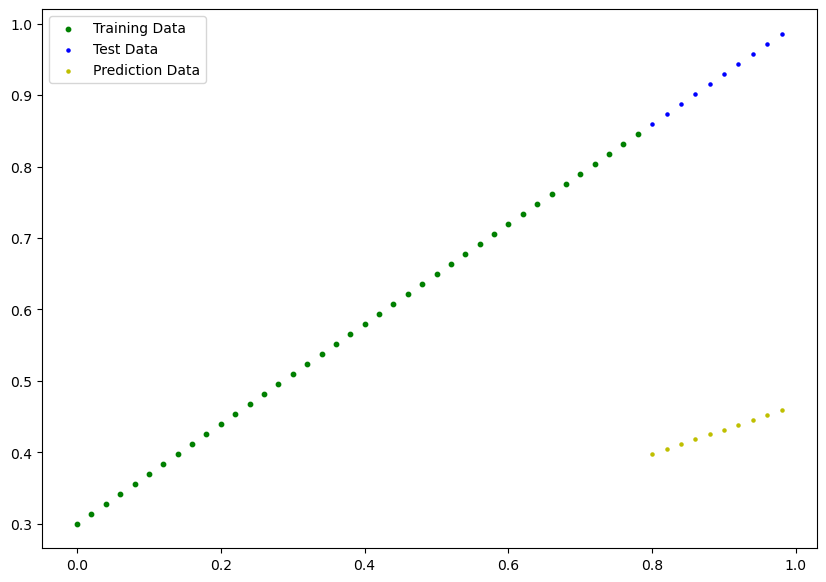

In [356]:
# Compute prediction error
# we know that we dont need the gradient descent to compute this time so we disable it by using no_grad
with torch.inference_mode():
    pred = model_0(X_test)
    

plot_predictions(prediction=pred)




## To train a model

In [ ]:
# Optimizing the Model Paramet ers

# to train a model we need a loss function and optimizer
# loss function: loss function or cost function is used to measure how wrong our model predict the data
# optimizers are used to update the parameters of the model using gradient decenct to make them generalize for the data

# loss function
loss_fun = nn.L1Loss()

# Optimizer  Stochatic Gradient Descent 
optimizer  = torch.optim.SGD(model_0.parameters(),lr=0.01)


In PyTorch, optimizer.zero_grad() is a crucial method used within the training loop of a neural network. Its purpose is to reset the gradients of all parameters that the optimizer is tracking to None. 

In [430]:
epochs = 100
for epoch in range(epochs):
    model_0.train() 
   
    # forward pass
    y_pred = model_0(X_test)
    
    # loss/error of model
    loss = loss_fun(y_pred, y_test)
    print(f"Loss: {loss}")
     # Backpropagation
    loss.backward()
    optimizer.step()
    
    # this is important step
    optimizer.zero_grad() 
     
     
    #  testing mode
    
    model_0.eval()
    with torch.inference_mode():
    # with torch.no_grad()
        test_pred = model_0(X_test)
        test_loss = loss_fun(test_pred,X_test) 
        
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict(),"\n\n")
    
    
    
    

Loss: 0.005703836679458618
Epoch: 0 | Loss: 0.005703836679458618 | Test Loss: 0.03475162386894226
OrderedDict({'weight': tensor([0.5860]), 'bias': tensor([0.4026])}) 


Loss: 0.005701327230781317
Loss: 0.005704564042389393
Loss: 0.005705344490706921
Loss: 0.0057028294540941715
Loss: 0.005700337700545788
Loss: 0.005697816610336304
Loss: 0.00569533696398139
Loss: 0.005692821927368641
Loss: 0.0056903185322880745
Loss: 0.005693167448043823
Epoch: 10 | Loss: 0.005693167448043823 | Test Loss: 0.03452882915735245
OrderedDict({'weight': tensor([0.5861]), 'bias': tensor([0.4022])}) 


Loss: 0.005694323685020208
Loss: 0.005691826343536377
Loss: 0.0056893168948590755
Loss: 0.005686819553375244
Loss: 0.005684304051101208
Loss: 0.005681824870407581
Loss: 0.005679321475327015
Loss: 0.005681776907294989
Loss: 0.005683320574462414
Loss: 0.0056808115914464
Epoch: 20 | Loss: 0.0056808115914464 | Test Loss: 0.034590959548950195
OrderedDict({'weight': tensor([0.5864]), 'bias': tensor([0.4020])}) 


Loss: 

In [431]:
with torch.inference_mode():
    # with torch.no_grad()
    new_pred = model_0(X_test)
    # test_loss = loss_fun(new_pred,X_test) 
        

In [432]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5886])), ('bias', tensor([0.4000]))])

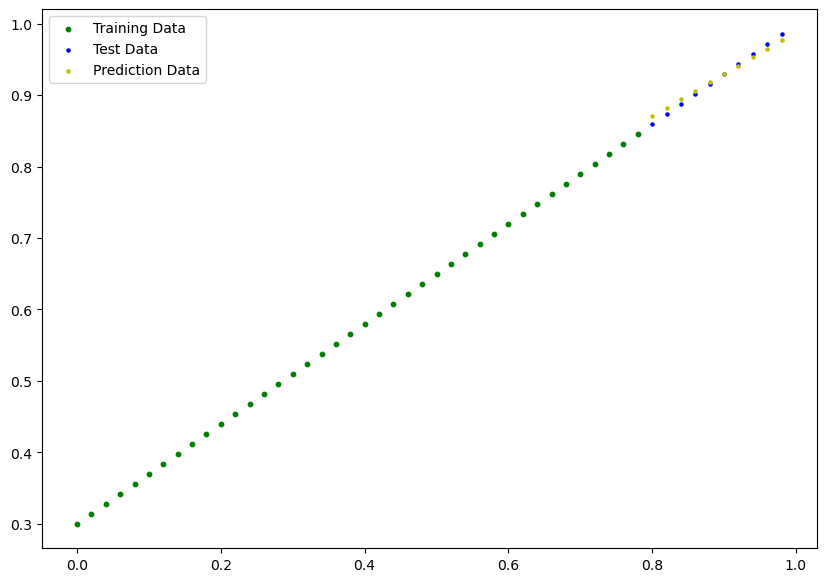

In [433]:
plot_predictions(prediction=new_pred)